# Final Project Group 15

In this notebook we will carry out the experiments to support our research questions.

Group Members:


Andres Garcia - 2646142
Yuanchao Lu - 2700631

## Package Imports

Run the cell below first always!

In [1]:
# Run this cell before anything else to import the packages you are allowed to used for this assignment

import numpy as np
import pandas as pd
import sklearn
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

pd.options.display.max_rows = 20

## Loading the Datasets

In [2]:
#store the data files location
booksdatafile   = 'books_data/books.csv'
ratingsdatafile  = 'books_data/ratings.csv'
usersdatafile = 'books_data/users.csv'

#load the data as dataframes
booksdf = pd.read_csv(booksdatafile, sep=";", 
                    error_bad_lines=False, encoding="latin-1")
booksdf.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True) #remove the columns we wont use

ratingsdf = pd.read_csv(ratingsdatafile, sep=";", 
                    error_bad_lines=False, encoding="latin-1");
usersdf = pd.read_csv(usersdatafile, sep=';', 
                    error_bad_lines=False, encoding="latin-1");

C:\Users\andre\AppData\Local\Temp\ipykernel_19072\1395339777.py:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  booksdf = pd.read_csv(booksdatafile, sep=";",
Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 10
Skipping line 245933: expected 8 fields,

### Books Dataset

In [3]:
booksdf.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


### Users Dataset

In [4]:
usersdf.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Ratings Dataset

In [5]:
ratingsdf.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


## Merging the frames
In order to avoid some calculations all over the dataframes provided, we instead can merge them toguether since the three dataframes are connected through the user-id and the ISBN columns. This way it will be much easier to query the merged frame for information.

In [6]:
merge_rating_books = pd.merge(ratingsdf, booksdf, on='ISBN')
finaldf = pd.merge(merge_rating_books, usersdf, on='User-ID')
finaldf.head(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa",NaN
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23.0


It is important to understand that some information will be easier to access from the individual dataframes, for example, calculating how many users are from a given country should be done in the individual dataframe, as the merge one will contain several instances of the same user if they have bought more than one book, which will produce a seemingly valid yet incorrect representation of the user demographics.

# Data Analysys
In this section we will carry out all the statistical data analysis in order to obtain valuable data to support or inspire our research questions

### Average Book Rating

In [7]:
mean_book_rating = finaldf["Book-Rating"].mean()
print("Average book rating:", mean_book_rating)

Average book rating: 2.839051298761754


### Highest Rated Author

In [8]:
mean_author_ratings = finaldf.groupby(['Book-Author'])['Book-Rating'].mean()
highest_rated_author = mean_author_ratings.idxmax()
print("Author with the highest average book ratings:", highest_rated_author)

Author with the highest average book ratings: A. D. Mills


### Highest Rated Publisher

In [9]:
mean_pub_ratings = finaldf.groupby(['Publisher'])['Book-Rating'].mean()
highest_rated_pub = mean_pub_ratings.idxmax()
print("Publisher with the highest average book ratings:", highest_rated_pub)

Publisher with the highest average book ratings:  Editions P. Terrail


### Top Rated Books

In [55]:
#extract first the book ratings
mean_book_ratings = finaldf.groupby(['Book-Title'])['Book-Rating'].mean()
count_book_ratings = finaldf.groupby(['Book-Title'])['Book-Rating'].count()
book_ratings = pd.DataFrame({'Mean-Rating': mean_book_ratings, 'Rating-Count': count_book_ratings})

#make sure the books have at least 5 ratings, otherwise the top rated book can be a book with just one 10 star rating
filtered_books = book_ratings[book_ratings['Rating-Count'] >= 100]
sorted_books = filtered_books.sort_values(by='Mean-Rating', ascending=False)
top_rated_books = sorted_books.head(10)


print("-----------------------------------------------------Top 10 Rated Books--------------------------------------------------")
i = 1
for title, row in top_rated_books.iterrows():
    print("Nr. " + str(i) + " - " + title)
    i += 1


-----------------------------------------------------Top 10 Rated Books--------------------------------------------------
Nr. 1 - Harry Potter and the Prisoner of Azkaban (Book 3)
Nr. 2 - Harry Potter and the Goblet of Fire (Book 4)
Nr. 3 - The Little Prince
Nr. 4 - Harry Potter and the Sorcerer's Stone (Book 1)
Nr. 5 - Harry Potter and the Order of the Phoenix (Book 5)
Nr. 6 - Ender's Game (Ender Wiggins Saga (Paperback))
Nr. 7 - Harry Potter and the Chamber of Secrets (Book 2)
Nr. 8 - The Perks of Being a Wallflower
Nr. 9 - The Hobbit : The Enchanting Prelude to The Lord of the Rings
Nr. 10 - The Fellowship of the Ring (The Lord of the Rings, Part 1)


### Highest Rated Books by Users Who Dislike The Top Rated Book

In [57]:
#we define an user disliking a book if it rated it 5 or below
users_disliked_top = merge_rating_books[(merge_rating_books['Book-Title'] == 'Harry Potter and the Prisoner of Azkaban (Book 3)') & (merge_rating_books['Book-Rating'] <= 5)]
id_list = users_disliked_top['User-ID'].unique()
filtered_df = merge_rating_books[merge_rating_books['User-ID'].isin(id_list)]

#remove the book since it could be returned as the most liked book
filtered_df = filtered_df[filtered_df['Book-Title'] != 'Harry Potter and the Prisoner of Azkaban (Book 3)']
pop = filtered_df['Book-Title'].value_counts()
most_pop = pop.idxmax()

print("The most liked book by users who disliked the top reated book is: " + most_pop)

The most liked book by users who disliked the top reated book is: Harry Potter and the Chamber of Secrets (Book 2)


# Users Age Data Statistical Analysis

In [11]:
#first we drop all rows where the user didnt enter their age or entered 0
clean_users = usersdf.dropna(subset=['Age'])
clean_users = clean_users[clean_users['Age'] != 0]
clean_users.head(5) 

,User-ID,Location,Age
1,2,"stockton, california, usa",18.0
3,4,"porto, v.n.gaia, portugal",17.0
5,6,"santa monica, california, usa",61.0
9,10,"albacete, wisconsin, spain",26.0
10,11,"melbourne, victoria, australia",14.0


## Users Age Demographics

In [12]:
#declare the age groups
children_to = 13
teenager_to = 18
adult_to = 65

In [13]:
#extract the age groups
children_users = clean_users[clean_users['Age'] < children_to]
teeneager_users = clean_users[(clean_users['Age'] >= children_to) & (clean_users['Age'] < teenager_to)]
adult_users = clean_users[(clean_users['Age'] >= teenager_to) & (clean_users['Age'] < adult_to)]
elder_users = clean_users[clean_users['Age'] >= adult_to]

#save the numbers in variables for graphing
n_children = len(children_users)
n_teeneagers = len(teeneager_users)
n_adults = len(adult_users) 
n_elders = len(elder_users)
total_users = n_children + n_teeneagers + n_adults + n_elders

#print rhe results
print('Amount of Children Users: ' + str(n_children))
print('Amount of Teenager Users: ' + str(n_teeneagers))
print('Amount of Adult Users: ' + str(n_adults))
print('Amount of Elderly Users: ' + str(n_elders))
print('Total Users: ' + str(total_users))

Amount of Children Users: 1050
Amount of Teenager Users: 10844
Amount of Adult Users: 151106
Amount of Elderly Users: 4680
Total Users: 167680


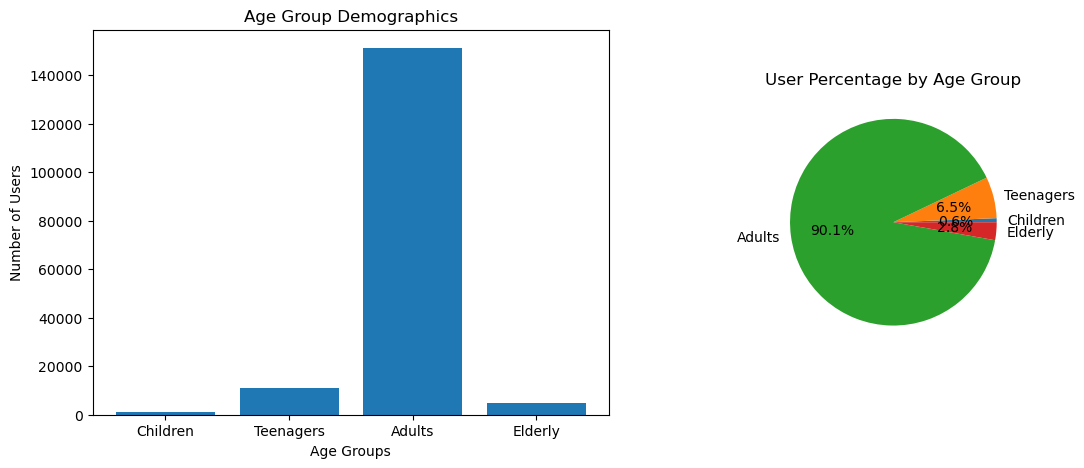

In [14]:
import matplotlib.pyplot as plt

values_bar = [n_children, n_teeneagers, n_adults, n_elders]
labels_bar = ['Children', 'Teenagers', 'Adults', 'Elderly']

values_pie = [n_children, n_teeneagers, n_adults, n_elders]
labels_pie = ['Children', 'Teenagers', 'Adults', 'Elderly']

#some chatgpt magic to display to plots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [2, 1]})

#bar graph
ax1 = axs[0]
ax1.bar(labels_bar, values_bar)
ax1.set_xlabel('Age Groups')
ax1.set_ylabel('Number of Users')
ax1.set_title('Age Group Demographics')

#pie chart, i think this is not considered scientific 
ax2 = axs[1]
ax2.pie(values_pie, labels=labels_pie, autopct='%1.1f%%')
ax2.set_title('User Percentage by Age Group')

#display them
plt.subplots_adjust(wspace=0.4)
plt.show()


## Highest Rated Book by Age Group

In [15]:
#create a copy of the merged df so we dont mees with the original one, always remember to do this in experiments
new_df = finaldf.copy()

#clean the new df
new_df = new_df.dropna(subset=['Age'])
new_df = new_df[new_df['Age'] != 0]

#extract the highest rated book by children
children_ratings = new_df[new_df['Age'] < children_to]
avg_children_ratings = children_ratings.groupby(['Book-Title'])['Book-Rating'].mean()
highest_rated_children = avg_children_ratings.idxmax()

#extract the highest rated book by teenagers
teenager_ratings = new_df[(new_df['Age'] >= children_to) & (new_df['Age'] < teenager_to)]
avg_teenager_ratings = teenager_ratings.groupby(['Book-Title'])['Book-Rating'].mean()
highest_rated_teenager = avg_teenager_ratings.idxmax()

#extract the highest rated book by adults
adult_ratings = new_df[(new_df['Age'] >= teenager_to) & (new_df['Age'] < adult_to)]
avg_adult_ratings = adult_ratings.groupby(['Book-Title'])['Book-Rating'].mean()
highest_rated_adult = avg_adult_ratings.idxmax()

#extract the highest rated book by elders
elder_ratings = new_df[new_df['Age'] >= adult_to]
avg_elder_ratings = elder_ratings.groupby(['Book-Title'])['Book-Rating'].mean()
highest_rated_elder = avg_elder_ratings.idxmax()

print("Highest Rated Book by Children: " + highest_rated_children)
print("Highest Rated Book by Teenagers: " + highest_rated_teenager)
print("Highest Rated Book by Adults: " + highest_rated_adult)
print("Highest Rated Book by Elders: " + highest_rated_elder)


Highest Rated Book by Children:  Final Fantasy Anthology: Official Strategy Guide (Brady Games)
Highest Rated Book by Teenagers: 1,001 Computer Hints &amp; Tips: An A-To-Z Guide to Making the Most of Your Computer and the Internet
Highest Rated Book by Adults:  Dark Justice
Highest Rated Book by Elders: 1421: The Year China Discovered America


## Highest Publisher by Age Group

In [16]:
#extract the highest rated publisher by children
avg_children_publisher_ratings = children_ratings.groupby(['Publisher'])['Book-Rating'].mean()
highest_publisher_children = avg_children_publisher_ratings.idxmax()

#extract the highest rated publisher by teenagers
avg_teenager_publisher_ratings = teenager_ratings.groupby(['Publisher'])['Book-Rating'].mean()
highest_publisher_teenager = avg_teenager_publisher_ratings.idxmax()

#extract the highest rated publisher by adults
avg_adult_publisher_ratings = adult_ratings.groupby(['Publisher'])['Book-Rating'].mean()
highest_publisher_adult = avg_adult_publisher_ratings.idxmax()

#extract the highest rated publisher by elders
avg_elder_publisher_ratings = elder_ratings.groupby(['Publisher'])['Book-Rating'].mean()
highest_publisher_elder = avg_elder_publisher_ratings.idxmax()

print("Highest Rated Publisher by Children: " + highest_publisher_children)
print("Highest Rated Publisher by Teenagers: " + highest_publisher_teenager)
print("Highest Rated Publisher by Adults: " + highest_publisher_adult)
print("Highest Rated Publisher Elders: " + highest_publisher_elder)

Highest Rated Publisher by Children: Active Synapse
Highest Rated Publisher by Teenagers: A. Michel
Highest Rated Publisher by Adults:  Editions P. Terrail
Highest Rated Publisher Elders: 22nd. Century, New York


## Highest Rated Author per Age Group

In [17]:
#extract the highest rated Author by children
avg_children_author_ratings = children_ratings.groupby(['Book-Author'])['Book-Rating'].mean()
highest_author_children = avg_children_author_ratings.idxmax()

#extract the highest rated publisher by teenagers
avg_teenager_author_ratings = teenager_ratings.groupby(['Book-Author'])['Book-Rating'].mean()
highest_author_teenager = avg_teenager_author_ratings.idxmax()

#extract the highest rated publisher by adults
avg_adult_author_ratings = adult_ratings.groupby(['Book-Author'])['Book-Rating'].mean()
highest_author_adult = avg_adult_author_ratings.idxmax()

#extract the highest rated publisher by elders
avg_elder_author_ratings = elder_ratings.groupby(['Book-Author'])['Book-Rating'].mean()
highest_author_elder = avg_elder_author_ratings.idxmax()

print("Highest Rated Author by Children: " + highest_author_children)
print("Highest Rated Author by Teenagers: " + highest_author_teenager)
print("Highest Rated Author by Adults: " + highest_author_adult)
print("Highest Rated Author Elders: " + highest_author_elder)

Highest Rated Author by Children: ANDREW GUTELLE
Highest Rated Author by Teenagers: ALBERT CAMUS
Highest Rated Author by Adults: A. D. Mills
Highest Rated Author Elders: A. Everitt


## Average Ratings per Age Group

In [18]:
#calculate the averages per group
avg_children_rating = children_ratings['Book-Rating'].mean()
avg_teenager_rating = teenager_ratings['Book-Rating'].mean()
avg_adult_rating = adult_ratings['Book-Rating'].mean()
avg_elder_rating = elder_ratings['Book-Rating'].mean()

#calculate the highest, we could just see it tho xd
highest_rating_group = max(avg_children_rating, avg_teenager_rating, avg_adult_rating, avg_elder_rating)

print("Average Book Ratings by Children: " + str(round(avg_children_rating, 2)))
print("Average Book Ratings by Teenagers: " + str(round(avg_teenager_rating, 2)))
print("Average Book Ratings by Adults: " + str(round(avg_adult_rating, 2)))
print("Average Book Ratings by Elder: " + str(round(avg_elder_rating, 2)))
print("Most Optimistic Group: Teenagers with an average rating of " + str(round(avg_teenager_rating, 2)))

Average Book Ratings by Children: 2.83
Average Book Ratings by Teenagers: 3.9
Average Book Ratings by Adults: 2.75
Average Book Ratings by Elder: 2.67
Most Optimistic Group: Teenagers with an average rating of 3.9


## Publisher Focus per Age Group

In [58]:
# Calculate the count of reviews for each publisher in each age group
children_reviews_nr = children_ratings['Publisher'].value_counts()
teenager_reviews_nr = teenager_ratings['Publisher'].value_counts()
adult_reviews_nr = adult_ratings['Publisher'].value_counts()
elder_reviews_nr = elder_ratings['Publisher'].value_counts()

# Find the publishers with the most reviews in each age group
focus_publisher_children = children_reviews_nr.idxmax()
focus_publisher_teenager = teenager_reviews_nr.idxmax()
focus_publisher_adult = adult_reviews_nr.idxmax()
focus_publisher_elder = elder_reviews_nr.idxmax()

print("Publisher with the Most Reviews for Children: " + focus_publisher_children)
print("Publisher with the Most Reviews for Teenagers: " + focus_publisher_teenager)
print("Publisher with the Most Reviews for Adults: " + focus_publisher_adult)
print("Publisher with the Most Reviews for Elders: " + focus_publisher_elder)

Publisher with the Most Reviews for Children: Scholastic
Publisher with the Most Reviews for Teenagers: Scholastic
Publisher with the Most Reviews for Adults: Ballantine Books
Publisher with the Most Reviews for Elders: Ballantine Books
